In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter
import calendar
import random

In [2]:
df = pd.read_csv(r"C:\Users\kamba\OneDrive\Excel Files\employee.csv")

In [7]:
df['Gender'].unique()
g=['Male', 'Female']
df['Gender'] = df['Gender'].str.replace('Need to check',random.choice(g))

In [28]:
df['Country'].unique()
c = ['United States of America', 'India', 'New Zealand']
df['Country'] = df['Country'].fillna(random.choice(c))

In [ ]:
df['Gender'].str.replace('Need to check',)

In [153]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239 entries, 0 to 238
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   EmpID          239 non-null    object        
 1   Name           239 non-null    object        
 2   Surname        239 non-null    object        
 3   Gender         239 non-null    object        
 4   Department     239 non-null    object        
 5   Salary         239 non-null    int64         
 6   Salary_type    239 non-null    object        
 7   Join_date      239 non-null    datetime64[ns]
 8   FTE            239 non-null    float64       
 9   Employee_type  239 non-null    object        
 10  Job_type       239 non-null    object        
 11  Location       239 non-null    object        
 12  Experience     239 non-null    float64       
 13  Country        239 non-null    object        
 14  Bonus          239 non-null    int64         
dtypes: datetime64[ns](1), f

In [ ]:
df['Join_date'] = pd.to_datetime(df['Join_date'], format = '%Y-%m-%d')

In [4]:
df['Gender'].unique()

array(['Male', 'Female', 'Need to check'], dtype=object)

### 1. Review and address the gender pay gap by investigating significant salary differences between male and female employees across departments to ensure fair compensation.

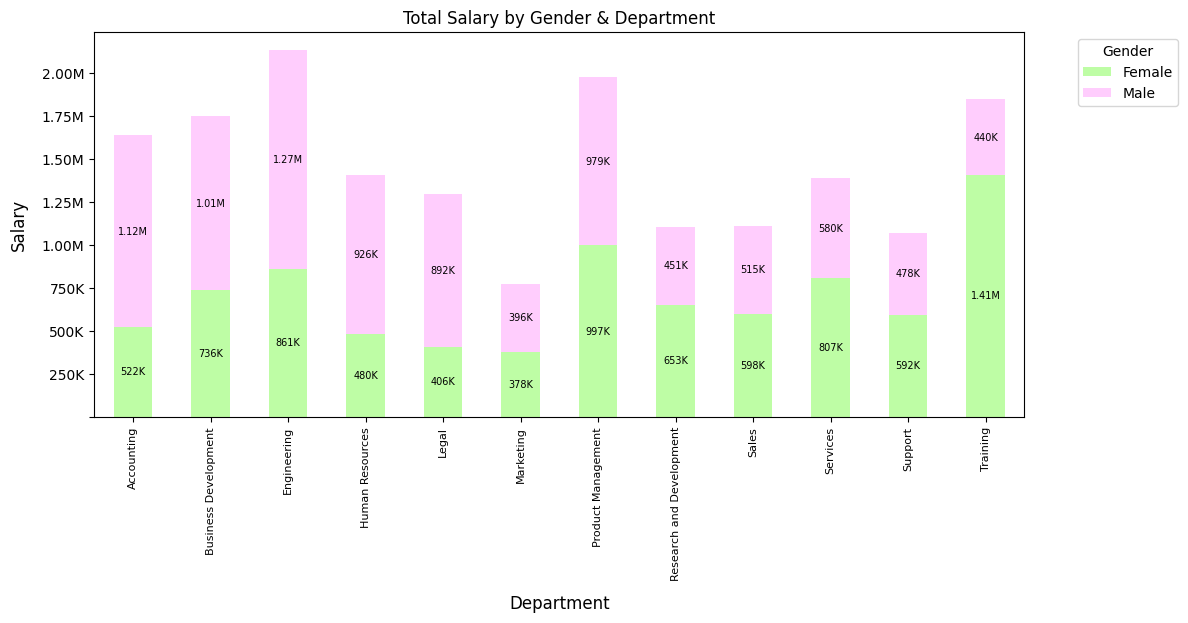

In [8]:
## To format the y-axis into millions

def axis(i, pos):
    if i >= 1000000000:
        return f'{1e-9*i:.2f}B'
    if i >= 1000000:
        return f'{1e-6*i:.2f}M'
    if i >= 1000:
        return f'{1e-3*i:.0f}K'
    
def axis_a(i):
    if i >= 1000000000:
        return f'{1e-9*i:.2f}B'
    if i >= 1000000:
        return f'{1e-6*i:.2f}M'
    if i >= 1000:
        return f'{1e-3*i:.0f}K'

total_avg_salary_by_department = df.groupby(['Department','Gender'])['Salary'].sum().reset_index()
total_avg_salary_by_department_pivot = total_avg_salary_by_department.pivot(index='Department', columns='Gender', values='Salary')
ax = total_avg_salary_by_department_pivot.plot(kind='bar', stacked=True, figsize=(12,5), colormap='vanimo_r')
plt.title('Total Salary by Gender & Department')
plt.xlabel('Department',fontsize=12, labelpad=10)
plt.ylabel('Salary',fontsize=12,labelpad=10)
plt.xticks(fontsize=8)
plt.ticklabel_format(axis='y', style='plain')
plt.gca().yaxis.set_major_formatter(FuncFormatter(axis))
plt.legend(title='Gender', bbox_to_anchor=(1.05,1))
for i in ax.containers:
    labels = [axis_a(v) for v in i.datavalues]
    ax.bar_label(i,fontsize=7,label_type='center',labels = labels)

plt.show()

### 2. Align business strategy and resource allocation to reflect the company's highest concentration of employees, which is in the United States of America.

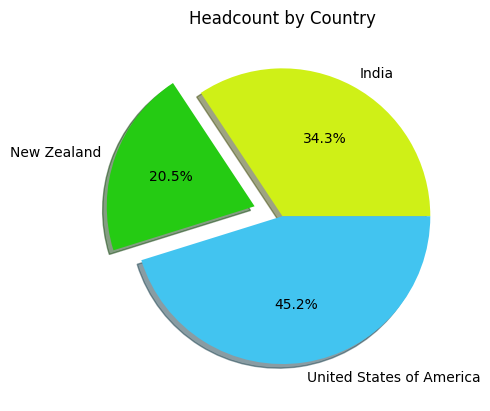

In [30]:
total_emps_by_country = df.groupby('Country')['EmpID'].count().reset_index()
total_emps_by_country

plt.pie(
    x=total_emps_by_country['EmpID'],
    labels = total_emps_by_country['Country'],
    autopct = '%1.1f%%',
    shadow=True,
    explode=(0,0.2,0),
    colors=["#CFF017","#25CB13","#42C4F0"]
)
plt.title('Headcount by Country')

plt.show()

### 3. Analyze and address the potential salary disparity between genders, particularly how the relationship between salary and experience differs for male and female employees.

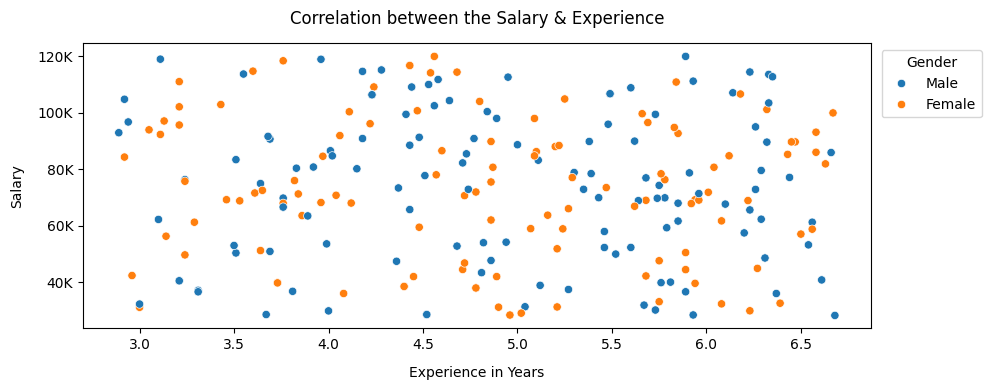

In [90]:
plt.figure(figsize=(10,4))
sns.scatterplot(data=df, x='Experience', y='Salary', hue='Gender')
plt.title('Correlation between the Salary & Experience',pad=14)
plt.xlabel('Experience in Years', labelpad=10)
plt.ylabel('Salary', labelpad=10)
plt.gca().yaxis.set_major_formatter(FuncFormatter(axis))
plt.legend(title='Gender', bbox_to_anchor=(1.15,1))
plt.tight_layout()
plt.show()

### 4. Analyze and standardize compensation for part-time employees (FTE < 1.0) to reduce salary disparity and ensure equitable pay compared to full-time staff.

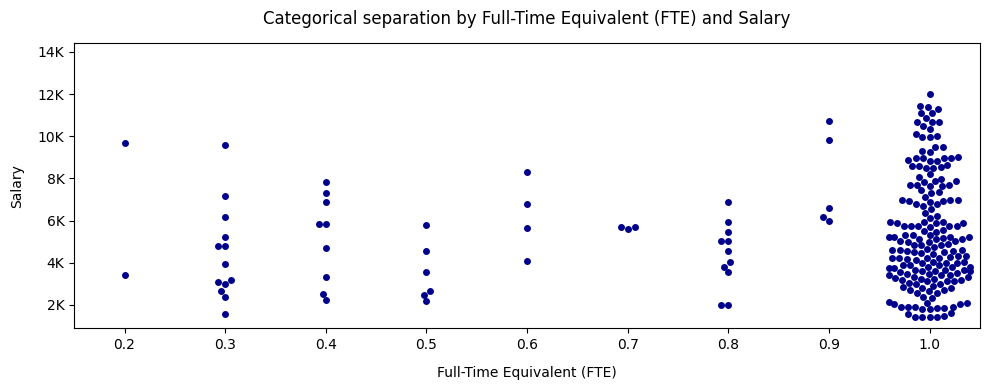

In [125]:
plt.figure(figsize=(10,4))
sns.swarmplot(data=df, x='FTE', y='Bonus', color='darkblue')
plt.title('Categorical separation by Full-Time Equivalent (FTE) and Salary',pad=14)
plt.xlabel('Full-Time Equivalent (FTE)', labelpad=10)
plt.ylabel('Salary', labelpad=10)
plt.gca().yaxis.set_major_formatter(FuncFormatter(axis))
plt.ylim(top=df['Bonus'].max()*1.2)
plt.tight_layout()
plt.show()

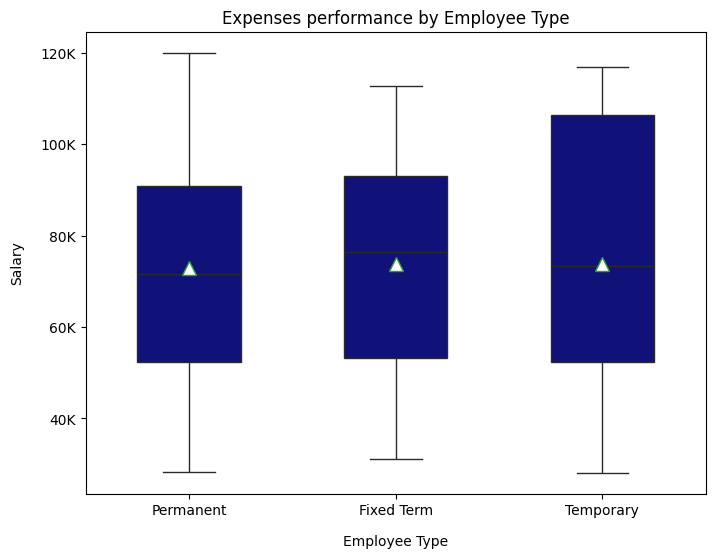

In [152]:
plt.figure(figsize=(8,6))
ax = sns.boxplot(data=df, x='Employee_type', y='Salary', width=0.5, color='darkblue', showmeans=True, 
                 meanprops={'markerfacecolor':'white','markersize':10,'linestyle':'-','color':'white'})
plt.title('Expenses performance by Employee Type')
plt.xlabel('Employee Type', labelpad=12)
plt.ylabel('Salary', labelpad=12)
plt.gca().yaxis.set_major_formatter(FuncFormatter(axis))

plt.show()